In [12]:
using Revise
using Reachability, MathematicalSystems, Plots

In [6]:
using TaylorIntegration
using TaylorModels: @taylorize
using Reachability: solve

@taylorize function vanderPol!(dx, x, params, t)
    local μ = 1.0
    dx[1] = x[2]
    dx[2] = (μ * x[2]) * (1 - x[1]^2) - x[1]
    return dx
end

𝑆 = BlackBoxContinuousSystem(vanderPol!, 2)
X0 = Hyperrectangle(low=[1.25, 2.35], high=[1.55, 2.45])
𝑃 = InitialValueProblem(𝑆, X0)

# reach mode
𝑂 = Options(:T=>7.0, :mode=>"reach")
sol = solve(𝑃, 𝑂, op=TMJets(:abs_tol=>1e-10, :orderT=>10, :orderQ=>2));

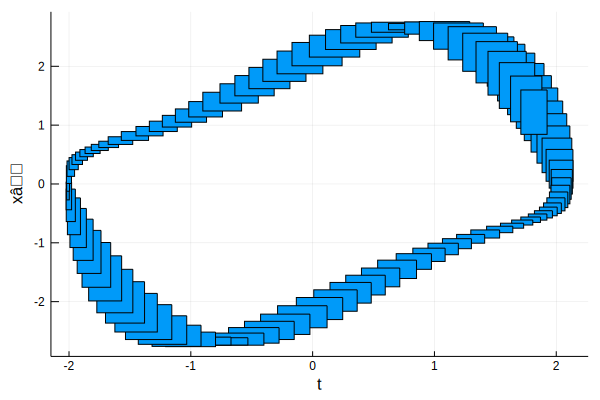

In [7]:
plot(sol)

In [8]:
# check mode
property=(t,x)->x[2] <= 2.75
𝑂 = Options(:T=>7.0, :mode=>"check", :property=>property)
solve(𝑃, 𝑂, op=TMJets(:abs_tol=>1e-10, :orderT=>10, :orderQ=>2))

ReachSolution{Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}},ReachSet{Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}}}(ReachSet{Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}}[ReachSet{Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}}(Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}([1.4, 2.4000000000000004], [0.15000000000000013, 0.04999999999999982]), 0.0, 0.04179695071050728), ReachSet{Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}}(Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}([1.450144527116234, 2.3154871970244466], [0.20230035847928307, 0.1849507104954342]), 0.041

In [14]:
using Test

In [15]:
# test output type option
sol = solve(𝑃, 𝑂, op=TMJets(:abs_tol=>1e-10, :orderT=>10, :orderQ=>2, :output_type=>Hyperrectangle));
@test set(sol.Xk[1]) isa Hyperrectangle

Test Passed

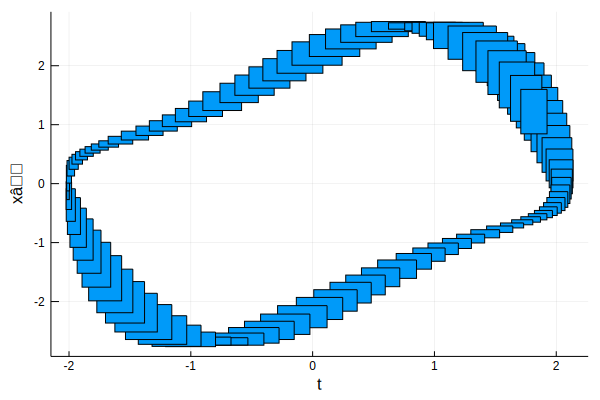

In [16]:
plot(sol)

In [20]:
using IntervalArithmetic: IntervalBox

sol = solve(𝑃, 𝑂, op=TMJets(:abs_tol=>1e-10, :orderT=>10, :orderQ=>2, :output_type=>IntervalBox));
@test set(sol.Xk[1]) isa IntervalBox

Test Passed

In [26]:
import TaylorModels
TaylorModels.fp_rpa

fp_rpa (generic function with 6 methods)

In [29]:
sol = solve(𝑃, 𝑂, op=TMJets(:abs_tol=>1e-10, :orderT=>10, :orderQ=>2, :output_type=>Zonotope));
@test set(sol.Xk[1]) isa Zonotope

Test Passed

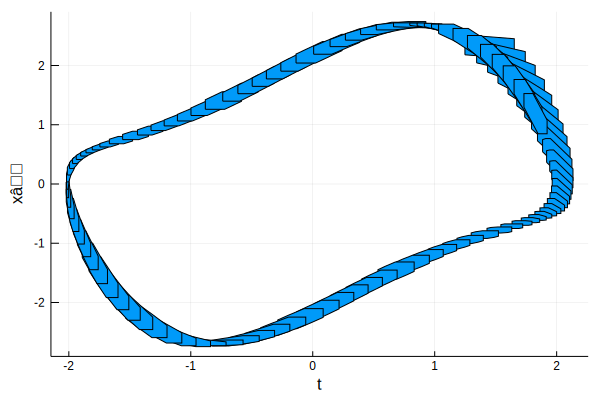

In [30]:
plot(sol)